In [1]:
import pandas as pd

In [21]:
import pandas as pd

# Open the file
with open('5 years data.txt', 'r') as f:
    # Read the entire file into a string
    the_string = f.read()

# Split the string into a list of rows
rows = [row.split() for row in the_string.split('\n')]

# Create a Pandas DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['Date', 'time', 'Source', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-med', 'Bx-min', 'Bx-max', 'By-med', 'By-min', 'By-max', 'Bz-med', 'Bz-min', 'Bz-max', 'Phi-mean', 'Phi-min', 'Phi-max', 'Theta-med', 'Theta-min', 'Theta-max', 'Dens-med', 'Dens-min', 'Dens-max', 'Speed-med', 'Speed-min', 'Speed-max', 'Temp-med', 'Temp-min', 'Temp-max'])

# Print the DataFrame
print(df)

            Date      time  Source  Bt-med  Bt-min  Bt-max  Bx-med  Bx-min  \
0           Date      time  Source  Bt-med  Bt-min  Bt-max  Bx-med  Bx-min   
1     2019-05-04  00:00:00       1    4.35    2.24   11.02    2.11   -4.73   
2     2019-05-05  00:00:00      -1  -99999  -99999  -99999  -99999  -99999   
3     2019-05-06  00:00:00       2    4.01    2.73    5.13    1.84   -2.55   
4     2019-05-07  00:00:00       1    3.73    1.28    4.70    2.13   -1.02   
...          ...       ...     ...     ...     ...     ...     ...     ...   
1612  2023-10-02  00:00:00       1  -99999  -99999  -99999  -99999  -99999   
1613  2023-10-03  00:00:00       1    7.58    5.56    8.60   -6.37   -7.91   
1614  2023-10-04  00:00:00       1    7.82    5.73    9.41   -3.49   -7.42   
1615  2023-10-05  00:00:00       1    4.36    2.17    7.49    0.30   -4.48   
1616        None      None    None    None    None    None    None    None   

      Bx-max  By-med  ...  Theta-max  Dens-med  Dens-min  Dens-

In [22]:
df = df[df['Date']!='Date']

In [23]:
df.head()

,Date,time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
1,2019-05-04,00:00:00,1,4.35,2.24,11.02,2.11,-4.73,10.15,-1.58,...,62.22,6.87,3.50,9.10,482.00,391.50,515.40,179360,55436,303319
2,2019-05-05,00:00:00,-1,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999
3,2019-05-06,00:00:00,2,4.01,2.73,5.13,1.84,-2.55,4.80,-2.31,...,66.19,4.35,1.40,7.36,373.80,322.50,392.80,42878,12791,75843
4,2019-05-07,00:00:00,1,3.73,1.28,4.70,2.13,-1.02,3.94,-0.70,...,53.41,4.70,2.37,11.02,351.90,327.40,382.20,29746,11704,55111
5,2019-05-08,00:00:00,1,2.62,0.86,3.37,2.18,0.59,3.09,-0.03,...,54.93,9.84,8.17,16.65,326.40,307.40,341.50,12476,7815,16210


In [24]:
df[['Bx-med', 'By-med', 'Bz-med']] = df[['Bx-med', 'By-med', 'Bz-med']].astype(float)


In [25]:
import numpy as np
import pandas as pd

def calculate_latitude(gsm_x, gsm_y, gsm_z):
    """Calculates the latitude from the GSM x, y, z coordinates.

    Args:
    gsm_x: The GSM x coordinate.
    gsm_y: The GSM y coordinate.
    gsm_z: The GSM z coordinate.

    Returns:
    The latitude in degrees.
    """

    # Calculate the distance from the Earth's center.
    distance_from_earth_center = np.sqrt(gsm_x**2 + gsm_y**2 + gsm_z**2)

    # Calculate the latitude.
    latitude = np.arctan(gsm_z / distance_from_earth_center) * 180 / np.pi

    return latitude

def add_latitude_to_dataframe(dataframe):
    """Adds a latitude column to the dataframe.

    Args:
    dataframe: A Pandas DataFrame.

    Returns:
    A Pandas DataFrame with a latitude column.
    """

    # Calculate the GSM coordinates from the GSE coordinates.
    gsm_coordinates = dataframe[['Bx-med', 'By-med', 'Bz-med']].to_numpy()

    # Calculate the latitude.
    latitude = calculate_latitude(gsm_coordinates[:, 0], gsm_coordinates[:, 1], gsm_coordinates[:, 2])

    # Add the latitude column to the dataframe.
    dataframe['latitude'] = latitude

    return dataframe

# Example usage:

# Create a data frame.

# Add the latitude column to the dataframe.
df = add_latitude_to_dataframe(df)

# Print the dataframe.
df.head()




,Date,time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude
1,2019-05-04,00:00:00,1,4.35,2.24,11.02,2.11,-4.73,10.15,-1.58,...,6.87,3.50,9.10,482.00,391.50,515.40,179360,55436,303319,-12.513441
2,2019-05-05,00:00:00,-1,-99999,-99999,-99999,-99999.00,-99999,-99999,-99999.00,...,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-30.000000
3,2019-05-06,00:00:00,2,4.01,2.73,5.13,1.84,-2.55,4.80,-2.31,...,4.35,1.40,7.36,373.80,322.50,392.80,42878,12791,75843,-11.958191
4,2019-05-07,00:00:00,1,3.73,1.28,4.70,2.13,-1.02,3.94,-0.70,...,4.70,2.37,11.02,351.90,327.40,382.20,29746,11704,55111,-13.178537
5,2019-05-08,00:00:00,1,2.62,0.86,3.37,2.18,0.59,3.09,-0.03,...,9.84,8.17,16.65,326.40,307.40,341.50,12476,7815,16210,24.093225


In [26]:
df = df[df['By-med'] != -99999.00]
df.head()

,Date,time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude
1,2019-05-04,00:00:00,1,4.35,2.24,11.02,2.11,-4.73,10.15,-1.58,...,6.87,3.50,9.10,482.00,391.50,515.40,179360,55436,303319,-12.513441
3,2019-05-06,00:00:00,2,4.01,2.73,5.13,1.84,-2.55,4.80,-2.31,...,4.35,1.40,7.36,373.80,322.50,392.80,42878,12791,75843,-11.958191
4,2019-05-07,00:00:00,1,3.73,1.28,4.70,2.13,-1.02,3.94,-0.70,...,4.70,2.37,11.02,351.90,327.40,382.20,29746,11704,55111,-13.178537
5,2019-05-08,00:00:00,1,2.62,0.86,3.37,2.18,0.59,3.09,-0.03,...,9.84,8.17,16.65,326.40,307.40,341.50,12476,7815,16210,24.093225
6,2019-05-09,00:00:00,1,4.16,1.04,7.85,1.66,-4.09,4.48,-1.14,...,9.37,4.77,21.64,364.30,304.30,390.80,61257,11286,97191,-3.686015


In [28]:
def calculate_max_fluctuations(gsm_x, gsm_y, gsm_z):
    """Calculates the maximum fluctuations of the horizontal components of the geomagnetic field GSM x, y, z.

    Args:
    gsm_x: The GSM x coordinate.
    gsm_y: The GSM y coordinate.
    gsm_z: The GSM z coordinate.

    Returns:
    The maximum fluctuations of the horizontal components of the geomagnetic field GSM x, y, z.
    """

    # Calculate the horizontal components of the geomagnetic field.
    gsm_horizontal = np.sqrt(gsm_x**2 + gsm_y**2)

    # Replace any NaN values in the gsm_horizontal array with 0.
    gsm_horizontal = np.nan_to_num(gsm_horizontal)

    # Calculate the maximum fluctuations of the horizontal components of the geomagnetic field.
    max_fluctuations = np.max(gsm_horizontal) - np.min(gsm_horizontal)

    return max_fluctuations

def add_max_fluctuations_to_dataframe(dataframe):
    """Adds a maximum fluctuations column to the dataframe.

    Args:
    dataframe: A Pandas DataFrame.

    Returns:
    A Pandas DataFrame with a maximum fluctuations column.
    """

    # Calculate the GSM coordinates from the GSE coordinates.
    gsm_coordinates = dataframe[['Bx-med', 'By-med', 'Bz-med']].to_numpy()

    # Calculate the maximum fluctuations of the horizontal components of the geomagnetic field.
    max_fluctuations = calculate_max_fluctuations(gsm_coordinates[:, 0], gsm_coordinates[:, 1], gsm_coordinates[:, 2])

    # Add the maximum fluctuations column to the dataframe.
    dataframe['max_fluctuations'] = max_fluctuations

    return dataframe

# Add the maximum fluctuations column to the dataframe.
df = add_max_fluctuations_to_dataframe(df)

# Print the dataframe.
df.head()

,Date,time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude,max_fluctuations
1,2019-05-04,00:00:00,1,4.35,2.24,11.02,2.11,-4.73,10.15,-1.58,...,3.50,9.10,482.00,391.50,515.40,179360,55436,303319,-12.513441,16.142893
3,2019-05-06,00:00:00,2,4.01,2.73,5.13,1.84,-2.55,4.80,-2.31,...,1.40,7.36,373.80,322.50,392.80,42878,12791,75843,-11.958191,16.142893
4,2019-05-07,00:00:00,1,3.73,1.28,4.70,2.13,-1.02,3.94,-0.70,...,2.37,11.02,351.90,327.40,382.20,29746,11704,55111,-13.178537,16.142893
5,2019-05-08,00:00:00,1,2.62,0.86,3.37,2.18,0.59,3.09,-0.03,...,8.17,16.65,326.40,307.40,341.50,12476,7815,16210,24.093225,16.142893
6,2019-05-09,00:00:00,1,4.16,1.04,7.85,1.66,-4.09,4.48,-1.14,...,4.77,21.64,364.30,304.30,390.80,61257,11286,97191,-3.686015,16.142893


In [29]:
def calculate_kp_indices(max_fluctuation, latitude):
    """Calculates the Kp indices from the maximum fluctuation and latitude.

    Args:
    max_fluctuation: The maximum fluctuation of the horizontal components of the geomagnetic field in nT.
    latitude: The latitude in degrees.

    Returns:
    The Kp indices.
    """

    kp_indices = 0.5 * np.log10(max_fluctuation) + 0.5 * (latitude / 10)

    return kp_indices

def add_kp_indices_to_dataframe(dataframe):
    """Adds a Kp indices column to the dataframe.

    Args:
    dataframe: A Pandas DataFrame.

    Returns:
    A Pandas DataFrame with a Kp indices column.
    """

    # Calculate the Kp indices.
    kp_indices = calculate_kp_indices(dataframe['max_fluctuations'], dataframe['latitude'])

    # Add the Kp indices column to the dataframe.
    dataframe['kp_indices'] = kp_indices

    return dataframe

# Example usage:

# Create a data frame.

# Add the Kp indices column to the dataframe.
df = add_kp_indices_to_dataframe(df)

# Print the dataframe.
df.head()

,Date,time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude,max_fluctuations,kp_indices
1,2019-05-04,00:00:00,1,4.35,2.24,11.02,2.11,-4.73,10.15,-1.58,...,9.10,482.00,391.50,515.40,179360,55436,303319,-12.513441,16.142893,-0.021681
3,2019-05-06,00:00:00,2,4.01,2.73,5.13,1.84,-2.55,4.80,-2.31,...,7.36,373.80,322.50,392.80,42878,12791,75843,-11.958191,16.142893,0.006081
4,2019-05-07,00:00:00,1,3.73,1.28,4.70,2.13,-1.02,3.94,-0.70,...,11.02,351.90,327.40,382.20,29746,11704,55111,-13.178537,16.142893,-0.054936
5,2019-05-08,00:00:00,1,2.62,0.86,3.37,2.18,0.59,3.09,-0.03,...,16.65,326.40,307.40,341.50,12476,7815,16210,24.093225,16.142893,1.808652
6,2019-05-09,00:00:00,1,4.16,1.04,7.85,1.66,-4.09,4.48,-1.14,...,21.64,364.30,304.30,390.80,61257,11286,97191,-3.686015,16.142893,0.419690


In [30]:
df.to_csv('last 5 y.csv')

In [31]:
df.drop(['time'] , inplace = True , axis = 1)

In [32]:
df ['Date'] = pd.to_datetime(df ['Date'])
df.tail()

,Date,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,latitude,max_fluctuations,kp_indices
1611,2023-10-01,1,5.03,3.60,5.94,-2.80,-4.91,0.19,2.27,-3.57,...,6.12,413.70,395.00,432.80,201046,61828,374897,-2.380867,16.142893,0.484947
1613,2023-10-03,1,7.58,5.56,8.60,-6.37,-7.91,1.71,1.70,-4.47,...,9.68,339.30,314.30,436.60,62372,10025,209472,-13.194437,16.142893,-0.055731
1614,2023-10-04,1,7.82,5.73,9.41,-3.49,-7.42,1.88,5.80,-1.07,...,7.22,407.10,328.40,474.40,121306,6533,464060,-14.981607,16.142893,-0.145090
1615,2023-10-05,1,4.36,2.17,7.49,0.30,-4.48,4.09,1.79,-4.80,...,13.25,453.00,428.90,490.00,176874,67577,242981,-33.097522,16.142893,-1.050885
1616,NaT,None,None,None,None,NaN,None,None,NaN,None,...,None,None,None,None,None,None,None,NaN,16.142893,NaN


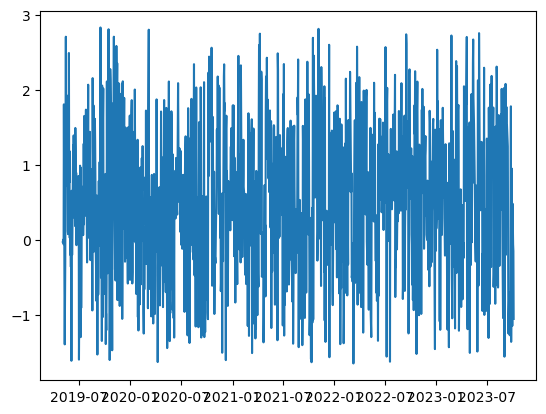

In [34]:
import matplotlib.pyplot as plt
plt.plot(df ['Date'], df ['kp_indices'])
plt.show()

In [35]:
new_column = df[['Date', 'kp_indices']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

/var/folders/05/hwkbx8yx2k1bl1k_6r4r10h80000gn/T/ipykernel_34115/1811516096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column.dropna(inplace=True)


,ds,y
1610,2023-09-30,-1.143282
1611,2023-10-01,0.484947
1613,2023-10-03,-0.055731
1614,2023-10-04,-0.145090
1615,2023-10-05,-1.050885


In [38]:
df.to_csv('last 5 y.csv')

In [39]:
%pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 910.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for holidays>=0.20 from https://files.pythonhosted.org/packages/2b/21/12a180f7dc75758d466ff1eeaef894504320d9af4fd48d50080129f5538d/holidays-0.34-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 1.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for plotly>=5.12.0 from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.2 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for plotly-resampler>=0.8.3 from https://files.pythonhosted.org/packages/08/1d/87d4ed45c26226630bcb0a205ff006c006

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pandas>=1.0.4 from https://files.pythonhosted.org/packages/30/6f/910f62af8642c94acca4fff529944c1e9463cf118742f7ee1a583fc6449c/pandas-2.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 4.3 MB/s eta 0:00:0000:0100:01
INFO: pip is still looking at multiple versions of plotly-resampler to determine which version is compatible with other requirements. This could take a while.